<a href="https://colab.research.google.com/github/alielkassas/DT_lecture/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

**Learning Objectives**

- Understand the core concepts of decision trees  
- Learn how to build and evaluate decision tree models  
- Tune hyperparameters to avoid over/underfitting (Bonus)



## Applying Decision Trees to Breast Cancer Diagnosis

### Load Data

In [ ]:
# Load the dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

### Data Spliting
Now we split our data into train and test sets:

In [ ]:
X, y = cancer.data,cancer.target

In [ ]:
# Split the data (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

### Building a Decision Tree Model


In [ ]:
# Import and Instantiate model
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

In [ ]:
# Training/Fitting Model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

- *What does the model look for during fitting a Decision Tree?*
![](https://github.com/alielkassas/DT_lecture/blob/main/images/DecisionTree.png?raw=true)

### Evaluating the Model

How do we know this was any good? Well, as a baseline, let's check the accuracy

In [ ]:
dt_clf.score(X_train, y_train)

1.0

**Amazing! Our Model Achieved 100% Accuracy!**

While achieving 100% accuracy might sound amazing, it’s often a **red flag** in machine learning. When a model performs **too perfectly** on the training data, it may have overfitted it (has learned the specific details and noise in the training set instead of general patterns).


In practice, we want a model that performs well on test set(unseen data), indicating it has learned meaningful patterns that generalize to new data.

Let's test our model on the test set to see how well it generalizes.


In [ ]:
dt_clf.score(X_test, y_test)

0.9090909090909091

It seems our model is doing very well on the training data, but not as well on the test data.  Let's take a look at what questions the model is asking in order to make its decision. We can visualize the questions the tree is asking

### Visualizing the Decision Tree

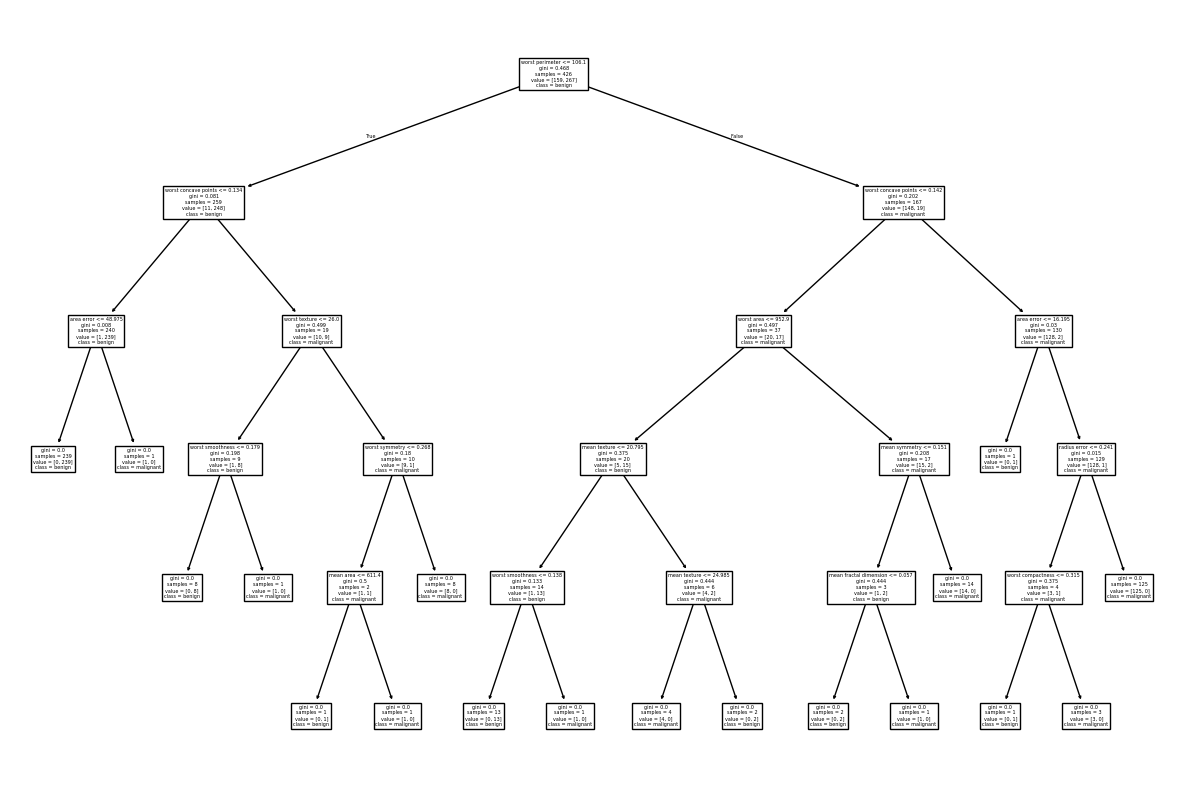

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
tree_dot = plot_tree(dt_clf,
                     feature_names=cancer.feature_names,
                     class_names=cancer.target_names)

**Woah! What happened here?**


Our decision tree has become **huge**! A big tree means we're asking too many questions and not learning general patterns from the data. This is called **overfitting**. Overfitting happens when a model performs well on the training data but much worse on the test data.

When fitting a decision tree, the model tries to grow as much as possible to predict every single observation perfectly. But this isn't helpful because it doesn't work well with new data.

Think of it like the game of "5 Questions" that we played but instead, we're playing "Infinite Questions". We’ll always get the answer right, but that doesn’t mean we've learned the best strategy!



---

### How to fix overfitting?

To solve this problem, we need to **stop the tree from growing too much**. One way to do this is to limit the number of questions the tree can ask (as we did in our game). We can use the `max_depth` parameter to set this limit and help prevent overfitting.


### Regularizing the Decision Tree (Bonus)

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

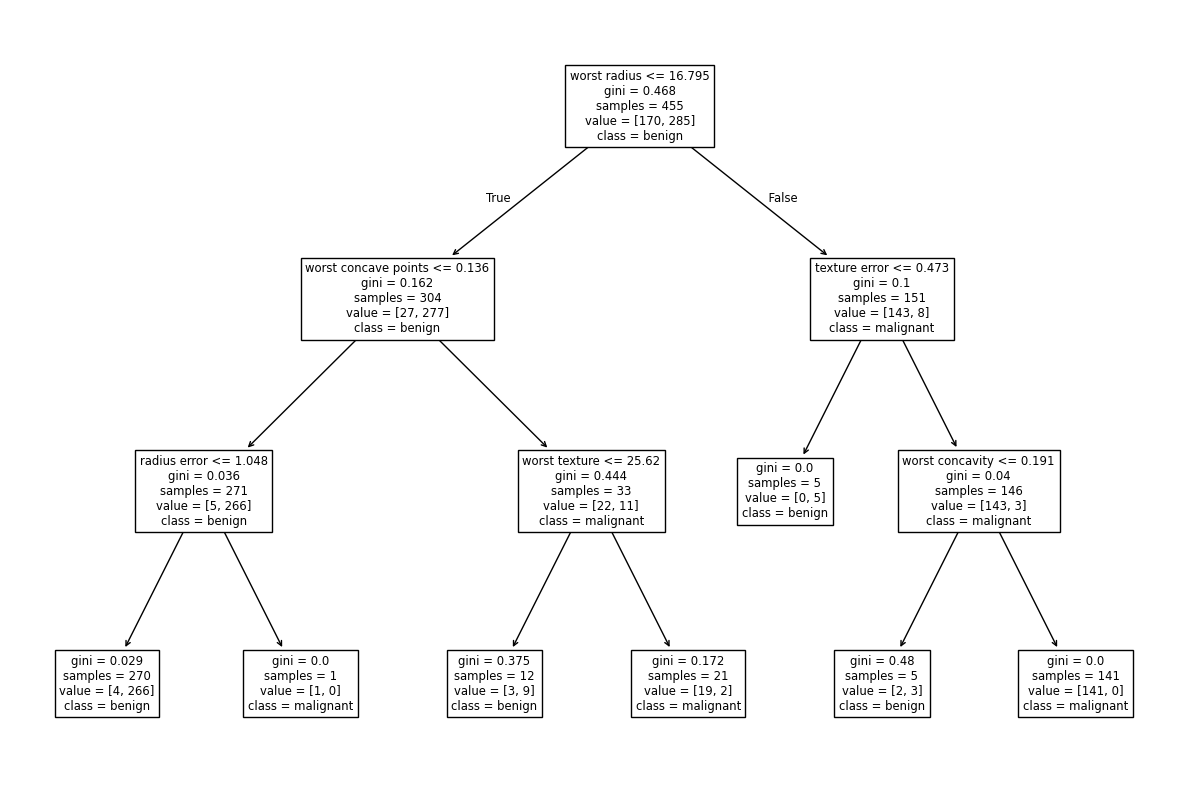

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
tree_dot = plot_tree(dt_clf,
                     feature_names=cancer.feature_names,
                     class_names=cancer.target_names)

Simple model right?

In [ ]:
dt_clf.score(X_train, y_train)

0.9765258215962441

In [ ]:
dt_clf.score(X_test, y_test)

0.916083916083916

You may have noticed that our training accuracy decreased while our testing accuracy improved and this is what matters most to us.

However, we still see signs of overfitting. Our goal now is to further reduce overfitting and increase the testing accuracy. How can we achieve that? It's your turn!

### Summary
![](https://github.com/alielkassas/DT_lecture/blob/main/images/DecisionTreeProsAndCons.png?raw=true)

## 🌳 STUDENT EXERCISE: Optimizing Decision Tree Parameters

**Objective:**

Your goal is to find the best `max_depth` to maximize accuracy on the test set while avoiding overfitting on the training set.




**Adjust the `max_depth` parameter:**
   - Start by experimenting with different values for `max_depth` (e.g., 2, 5, 8, etc.).
   - Observe how each value impacts the accuracy on both the training and test sets.
   - **Question:** Which `max_depth` value provides the best balance between high accuracy and avoiding overfitting?



### **Reference:**
For more information on the DecisionTreeClassifier, visit [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
